In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sp100_symbol = '^OEX'
amazon_symbol = 'AMZN'

sp100_data = yf.download(sp100_symbol, start="1997-05-15", end="2024-03-20")
sp100_data.reset_index(inplace=True)
sp100_data.drop(columns=['Adj Close'], inplace=True)
amazon_data = yf.download(amazon_symbol, start="1997-01-01", end="2024-03-20")
amazon_data.reset_index(inplace=True)
amazon_data.drop(columns=['Adj Close'], inplace=True)

amazon_data.columns = ['Date', 'AMZN_Open', 'AMZN_High', 'AMZN_Low', 'AMZN_Close', 'AMZN_Volume']
sp100_data.columns = ['Date', 'sp100_Open', 'sp100_High', 'sp100_Low', 'sp100_Close', 'sp100_Volume']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
amazon_data.head()

,Date,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000


In [4]:
sp100_data.head()

,Date,sp100_Open,sp100_High,sp100_Low,sp100_Close,sp100_Volume
0,1997-05-15,410.994995,414.295013,409.625000,414.200012,916360000
1,1997-05-16,414.200012,414.200012,406.279999,406.279999,973560000
2,1997-05-19,406.279999,410.350006,406.279999,409.230011,690280000
3,1997-05-20,409.230011,414.480011,405.890015,414.160004,901700000
4,1997-05-21,414.160004,416.739990,411.035004,413.140015,1081460000


In [5]:
gdp = pd.read_csv('GDP.csv')
gdp.head()

,DATE,GDP
0,1997-04-01,8518.825
1,1997-07-01,8662.823
2,1997-10-01,8765.907
3,1998-01-01,8866.480
4,1998-04-01,8969.699


In [6]:
inflation = pd.read_csv('inflation.csv', sep=';', usecols=['Year', 'United States of America', 'EU', 'World'])
inflation.columns = ['Year', 'infl_USA', 'infl_EU', 'infl_World']
inflation.dropna(inplace=True)
inflation['Year'] = inflation['Year'].astype(int)
inflation.head()

,Year,infl_USA,infl_EU,infl_World
0,2024,3.20,2.95,5.20
1,2023,3.80,6.40,6.80
2,2022,8.00,8.83,7.97
3,2021,4.70,2.55,3.47
4,2020,1.23,0.48,1.94


In [7]:
sp100_amzn = pd.concat([amazon_data, sp100_data.drop(columns=['Date'])], axis=1)
sp100_amzn['Year'] = sp100_amzn['Date'].dt.year
sp100_amzn.head()

,Date,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume,sp100_Open,sp100_High,sp100_Low,sp100_Close,sp100_Volume,Year
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,410.994995,414.295013,409.625000,414.200012,916360000,1997
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,414.200012,414.200012,406.279999,406.279999,973560000,1997
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,406.279999,410.350006,406.279999,409.230011,690280000,1997
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,409.230011,414.480011,405.890015,414.160004,901700000,1997
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,414.160004,416.739990,411.035004,413.140015,1081460000,1997


In [8]:
sp100_amzn_infl = pd.merge(sp100_amzn, inflation, how='left', left_on='Year', right_on='Year')
sp100_amzn_infl.head()

,Date,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume,sp100_Open,sp100_High,sp100_Low,sp100_Close,sp100_Volume,Year,infl_USA,infl_EU,infl_World
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,410.994995,414.295013,409.625000,414.200012,916360000,1997,2.34,3.11,5.57
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,414.200012,414.200012,406.279999,406.279999,973560000,1997,2.34,3.11,5.57
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,406.279999,410.350006,406.279999,409.230011,690280000,1997,2.34,3.11,5.57
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,409.230011,414.480011,405.890015,414.160004,901700000,1997,2.34,3.11,5.57
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,414.160004,416.739990,411.035004,413.140015,1081460000,1997,2.34,3.11,5.57


In [10]:
revenue = pd.read_csv('revenue.csv', sep=';', usecols = ['Date', 'Revenue_B'])
revenue.dropna(inplace=True)
revenue.columns = ['Date', 'Revenue_Billions']
revenue['Date'] = pd.to_datetime(revenue['Date'])
revenue.head()

,Date,Revenue_Billions
0,2023-12-31,574.78
1,2022-12-31,513.98
2,2021-12-31,469.82
3,2020-12-31,386.06
4,2019-12-31,280.52


In [446]:
revenue.head()

,Date,Revenue_Billions,prev_revenue,diff,diff_per_day
0,2023-12-31,574.78,513.98,60.80,0.166575
1,2022-12-31,513.98,469.82,44.16,0.120986
2,2021-12-31,469.82,386.06,83.76,0.229479
3,2020-12-31,386.06,280.52,105.54,0.289151
4,2019-12-31,280.52,232.89,47.63,0.130493


In [11]:
sp100_amzn_infl = sp100_amzn_infl.append({'Date':'2000-12-31'}, ignore_index=True)
sp100_amzn_infl = sp100_amzn_infl.append({'Date':'2005-12-31'}, ignore_index=True)
sp100_amzn_infl = sp100_amzn_infl.append({'Date':'2006-12-31'}, ignore_index=True)
sp100_amzn_infl = sp100_amzn_infl.append({'Date':'2011-12-31'}, ignore_index=True)
sp100_amzn_infl = sp100_amzn_infl.append({'Date':'2016-12-31'}, ignore_index=True)
sp100_amzn_infl = sp100_amzn_infl.append({'Date':'2017-12-31'}, ignore_index=True)
sp100_amzn_infl = sp100_amzn_infl.append({'Date':'2022-12-31'}, ignore_index=True)
sp100_amzn_infl = sp100_amzn_infl.append({'Date':'2023-12-31'}, ignore_index=True)
sp100_amzn_infl['Date'] = pd.to_datetime(sp100_amzn_infl['Date'])
sp100_amzn_infl = sp100_amzn_infl.sort_values(by='Date')

In [12]:
with_revenue = pd.merge(sp100_amzn_infl, revenue, how='left', left_on='Date', right_on='Date')
with_revenue.index = pd.to_datetime(with_revenue['Date'])
with_revenue.head()

,Date,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume,sp100_Open,sp100_High,sp100_Low,sp100_Close,sp100_Volume,Year,infl_USA,infl_EU,infl_World,Revenue_Billions
Date,,,,,,,,,,,,,,,,
1997-05-15,1997-05-15,0.121875,0.125000,0.096354,0.097917,1.443120e+09,410.994995,414.295013,409.625000,414.200012,9.163600e+08,1997.0,2.34,3.11,5.57,NaN
1997-05-16,1997-05-16,0.098438,0.098958,0.085417,0.086458,2.940000e+08,414.200012,414.200012,406.279999,406.279999,9.735600e+08,1997.0,2.34,3.11,5.57,NaN
1997-05-19,1997-05-19,0.088021,0.088542,0.081250,0.085417,1.221360e+08,406.279999,410.350006,406.279999,409.230011,6.902800e+08,1997.0,2.34,3.11,5.57,NaN
1997-05-20,1997-05-20,0.086458,0.087500,0.081771,0.081771,1.093440e+08,409.230011,414.480011,405.890015,414.160004,9.017000e+08,1997.0,2.34,3.11,5.57,NaN
1997-05-21,1997-05-21,0.081771,0.082292,0.068750,0.071354,3.770640e+08,414.160004,416.739990,411.035004,413.140015,1.081460e+09,1997.0,2.34,3.11,5.57,NaN


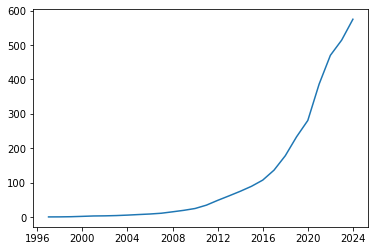

In [14]:
plt.plot(revenue['Date'], revenue['Revenue_Billions']);

In [16]:
revenue['Previous_Revenue'] = revenue.shift(periods=-1)['Revenue_Billions']
revenue['Diff'] = revenue['Revenue_Billions'] - revenue['Previous_Revenue']
revenue['Diff_per_day'] = revenue['Diff']/365

In [17]:
revenue.head()

,Date,Revenue_Billions,Previous_Revenue,Diff,Diff_per_day
0,2023-12-31,574.78,513.98,60.80,0.166575
1,2022-12-31,513.98,469.82,44.16,0.120986
2,2021-12-31,469.82,386.06,83.76,0.229479
3,2020-12-31,386.06,280.52,105.54,0.289151
4,2019-12-31,280.52,232.89,47.63,0.130493


In [24]:
dates = pd.DataFrame(revenue['Date'])
start_date = dates['Date'].min()
end_date = dates['Date'].max()
date_range = pd.date_range(start=start_date, end=end_date)
dates.fillna('Missing', inplace=True)
dates = dates.set_index('Date').reindex(date_range).reset_index()
dates.columns=['Date']
dates['year'] = dates['Date'].dt.year
dates.head()

,Date,year
0,1996-12-31,1996
1,1997-01-01,1997
2,1997-01-02,1997
3,1997-01-03,1997
4,1997-01-04,1997


In [25]:
rev = revenue[['Date', 'Revenue_Billions']]
rev['year'] = rev['Date'].dt.year
rev.head()

,Date,Revenue_Billions,year
0,2023-12-31,574.78,2023
1,2022-12-31,513.98,2022
2,2021-12-31,469.82,2021
3,2020-12-31,386.06,2020
4,2019-12-31,280.52,2019


In [27]:
dif = pd.DataFrame(revenue[['Date', 'Diff_per_day']])
dif['year'] = dif['Date'].dt.year
dif.drop(columns=['Date'], inplace=True)
dif.head()

,Diff_per_day,year
0,0.166575,2023
1,0.120986,2022
2,0.229479,2021
3,0.289151,2020
4,0.130493,2019


In [32]:
rev_dates_with_nan = pd.merge(dates, rev, how='left', left_on='Date', right_on='Date')
rev_dates_with_nan.drop(columns=['year_y'], inplace=True)
rev_dates_with_nan.columns = ['Date', 'year', 'RB']
rev_dates_with_nan.head()

,Date,year,RB
0,1996-12-31,1996,0.01575
1,1997-01-01,1997,NaN
2,1997-01-02,1997,NaN
3,1997-01-03,1997,NaN
4,1997-01-04,1997,NaN


In [39]:
rev_dates = pd.merge(rev_dates_with_nan, dif, how='left', left_on='year', right_on='year')

for i in range(len(rev_dates)):
    if np.isnan(rev_dates['RB'].iloc[i]):
        rev_dates['RB'].iloc[i] = rev_dates['RB'].iloc[i-1]+rev_dates['Diff_per_day'].iloc[i]

rev_dates = rev_dates[rev_dates['Date']>='1997-05-15']
rev_dates.drop(columns=['year', 'Diff_per_day'], inplace=True)
        
rev_dates.head()

,Date,RB
135,1997-05-15,0.064587
136,1997-05-16,0.064948
137,1997-05-17,0.065310
138,1997-05-18,0.065672
139,1997-05-19,0.066034


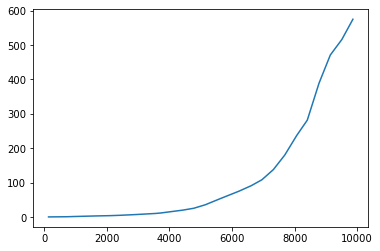

In [40]:
rev_dates['RB'].plot();

In [41]:
with_revenue = with_revenue.reset_index(drop=True)

In [42]:
final_df = pd.merge(with_revenue, rev_dates, how='left', left_on='Date', right_on='Date')
final_df.drop(columns=['Revenue_Billions'], inplace=True)
final_df['Revenue_Billions'] = final_df['RB']
final_df.drop(columns=['RB'], inplace=True)
final_df = final_df[final_df['Date']<'2023-12-31']
final_df.head()

,Date,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume,sp100_Open,sp100_High,sp100_Low,sp100_Close,sp100_Volume,Year,infl_USA,infl_EU,infl_World,Revenue_Billions
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1.443120e+09,410.994995,414.295013,409.625000,414.200012,9.163600e+08,1997.0,2.34,3.11,5.57,0.064587
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,2.940000e+08,414.200012,414.200012,406.279999,406.279999,9.735600e+08,1997.0,2.34,3.11,5.57,0.064948
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,1.221360e+08,406.279999,410.350006,406.279999,409.230011,6.902800e+08,1997.0,2.34,3.11,5.57,0.066034
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,1.093440e+08,409.230011,414.480011,405.890015,414.160004,9.017000e+08,1997.0,2.34,3.11,5.57,0.066395
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,3.770640e+08,414.160004,416.739990,411.035004,413.140015,1.081460e+09,1997.0,2.34,3.11,5.57,0.066757


In [16]:
final_df.to_csv('data.csv', index=False)